<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Для разработки метода защиты персональных данных мы:
1. Загрузим и изучим данные.
2. Ответьтим на вопрос и обоснуем решение:
- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    - a. Изменится. (В этом случае приведём примеры матриц.)
    - b. Не изменится. (Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.)
3. Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.
4. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования, применим метрику R2.

## Загрузка данных

Для начала импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Теперь прочтём файл и сохраним его в переменной df.

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

Выведем таблицу на экран.

In [3]:
display(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


По названиям столбцов мы понимаем какие данные в них хранятся. Пол обозначен 0 и 1, возраст клиента имеет тип данных с плавающей точкой, но убедимся в этом при следующем шаге. Также указана зарплата, количество членов семьи кроме клиента и количество страховых выплат за последние 5 лет.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Действительно, в столбцах Возраст и Зарплата тип данных с плавающей точкой, их нужно будет изменить на целочисленный. В столбцах одинаковое количество данных, оно совпадает с количеством строк, значит, пропуски отсутствуют. Проверим есть ли дубликаты.

In [5]:
df.duplicated().sum()

153

В таблице есть дубликаты, их нужно удалить.

In [6]:
df = df.drop_duplicates()

Все дубликаты удалены.

Изменим тип данных

In [7]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

Данные подготовлены, представим их для наглядности на графиках.

Text(0.5, 1.0, 'Распределение по гендеру')

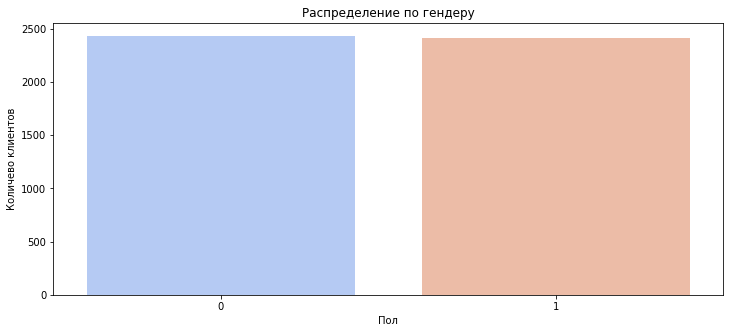

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x= 'Пол', data=df, palette='coolwarm')
plt.ylabel(f'Количево клиентов')
plt.title(f'Распределение по гендеру')

На графике заметно, что клиентов с гендером 0 чуть больше, чем клиентов с гендером 1.

Text(0.5, 1.0, 'Распределение по количеству членов семьи')

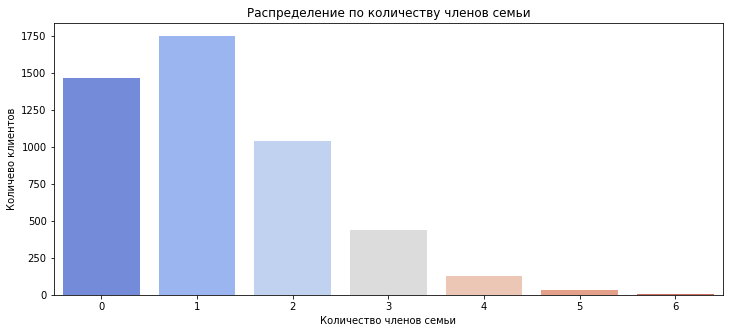

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x= 'Члены семьи', data=df, palette='coolwarm')
plt.ylabel(f'Количево клиентов')
plt.xlabel(f'Количество членов семьи')
plt.title(f'Распределение по количеству членов семьи')

Самое распространённое количество членов семьи кроме клиента - один, за ним расположено ни одного члена семьи, далее - два, потом количество человек от трёх до шести идёт на убывание.

Text(0.5, 1.0, 'Распределение по количеству страховых выплат')

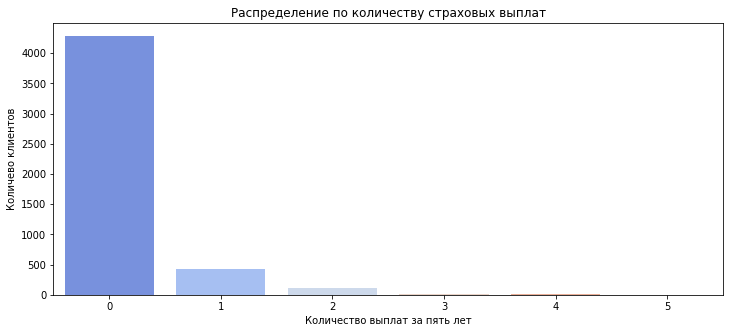

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x= 'Страховые выплаты', data=df, palette='coolwarm')
plt.ylabel(f'Количево клиентов')
plt.xlabel(f'Количество выплат за пять лет')
plt.title(f'Распределение по количеству страховых выплат')

Чаще всего страховой случай не наступает, соответственно, выплата не происходит.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


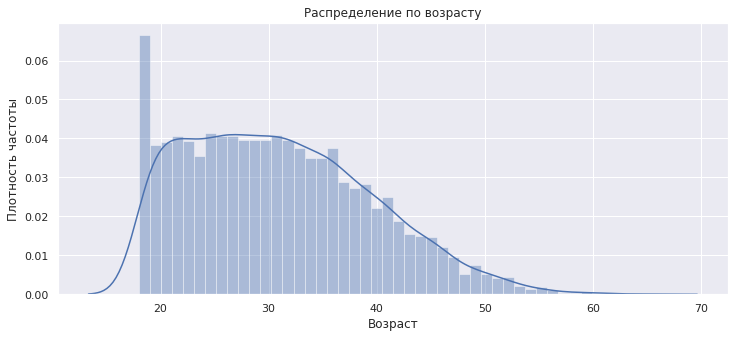

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты');

Возраст большинства клиентов - 19 лет.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


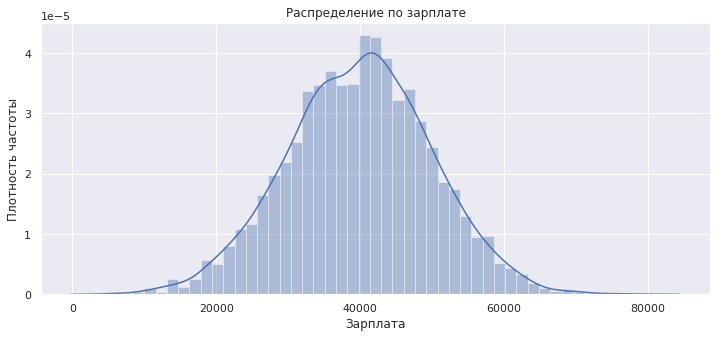

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Зарплата'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

Средний уровень зарплаты находится в районе 40.000.

Итак, в ходе предобработки данных мы прочли файл и сохранили его в переменной, нашли и удалили дубликаты, а также построили графики. Можем переходить к следующим этапам проекта.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится, изменится лишь вектор весов линейной регрессии для новых признаков.

**Обоснование:** Представим нашу новую матрицу признаков как результат умножения исходной матрицы признаков на некую обратимую матрицу:

$$
X_1 = XP
$$

Тогда наша формула обучения примет вид: $w_1 = (X^T_1 X_1)^−1 X^T_1 y$

Подставив в нее значения $X_1$, получим: $w_1 = ((XP)^T XP)^{-1} (XP)^T y$

Воспользуемся следующими свойствами матриц, а именно:

$$
(AB)C = A(BC)
$$

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

$$
(AB)^T = B^TA^T
$$


$$
(A^T)^{-1} = (A^{-1})^T
$$

$$
(ABC)^{-1} =C^{-1} B^{-1} A^{-1}
$$

$$
AA^{-1} = E
$$

$$
AE=EA=A
$$

Тогда нашу формулу для расчета вектора весов можно переписать:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y 

$$
w_1 = (P^T (X^T X) P)^{-1} (XP)^T y 
$$
    
$$
w_1 = (P^T (X^T X) P)^{-1} P^T X^T y 
$$

$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

$$
w_1 = P^{-1} (X^T X)^{-1} E X^T y 
$$

$$
w_1 = P^{-1}w
$$

Тоже самое, для формулы предсказаний: $a_1 = X_1w_1$, подставив получившиеся значения $X_1 = XP$ и $w_1 = P^{-1}w$, получим: 
$a_1 = XPP^{-1}w$ и $a_1 = Xw$

Тем самым получаем, что наши предсказания не изменятся.

## Алгоритм преобразования

**Алгоритм**

Нам нужно:
1. Сгенерировать обратимую матрицу, соответственно квадратную, размерностью соответствующую количеству столбцов признаков, а это 4х4.
2. Умножить матрицу исходных признаков на сгенерированную матрицу.
3. Посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

**Обоснование**

Так как мы выяснили, что предсказания на измененной и изначальной матрице не изменятся, поэтому результаты метрики R2 должны быть равны. Таким образом, мы сможем доказать, что правильно произвели защиту данных.

## Проверка алгоритма

Итак, сначла необходимо выделить признаки и целевой признак.

In [16]:
target = df.loc[:, 'Страховые выплаты']
features = df.drop(['Страховые выплаты'], axis=1)

Теперь сгенерируем матрицу размером 4х4 методом random.normal (), т.к. при таком подходе вероятность получить необратимую матрицу близка к нулю

In [17]:
matrix_generated = np.random.normal(size=(4, 4))
display (matrix_generated)

array([[ 4.30718668, -1.21438651,  1.88029268,  1.72433453],
       [ 2.66905135,  0.31828651, -0.91308061,  0.82611319],
       [-1.0996424 , -0.22253194,  3.08990534, -0.07891161],
       [ 0.90978229, -0.21847267,  0.69940396, -1.26103846]])

Сделаем из сгенерированной матрицы обратную с помощью метода linalg.inv(), так как в процессе обращения мы одновременно проверим матрицу на обратимость, если появится ошибка, то сгенерированная матрица не является обратимой.

In [18]:
matrix_invert = np.linalg.inv(matrix_generated)
display (matrix_invert)

array([[ 0.02861197,  0.26205186,  0.0124894 ,  0.21001386],
       [-0.6145426 ,  1.31723757,  0.76899036, -0.02551227],
       [-0.031273  ,  0.1898145 ,  0.38575283,  0.05744691],
       [ 0.10976586,  0.06612546,  0.08973265, -0.60520024]])

Создадим матрицу из изначальных признаков, умножим ее на сгенерированную и обращенную матрицу, составим из полученной матрицы новый набор измененных признаков.

In [19]:
matrix = features.values
matrix_new = matrix @ matrix_invert
features_incode = pd.DataFrame (matrix_new, columns = features.columns)

Выведем его на экран.

In [20]:
display (features_incode)

,Пол,Возраст,Зарплата,Члены семьи
0,-1576.198840,9469.134186,19164.971430,2847.925724
1,-1216.533325,7273.610106,14694.071010,2181.203951
2,-674.554808,4024.304418,8123.110250,1205.645329
3,-1316.770107,7943.058947,16102.221472,2393.790138
4,-833.403971,4991.303190,10089.693206,1498.860115
...,...,...,...,...
4842,-1133.433885,6813.392602,13793.087396,2048.930071
4843,-1659.490064,9991.132075,20239.683946,3008.745654
4844,-1072.226138,6461.188599,13092.580370,1945.729724
4845,-1035.789241,6236.373850,12631.317171,1876.347217


Создадим класс LinearRegression для обучения модели.

In [21]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель на изначальных признаках и выведем на экран метрику качества R2.

In [22]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010046633359


Обучим модель на закодированных признаках и выведем на экран метрику качества R2.

In [23]:
model = LinearRegression()
model.fit(features_incode, target)
predictions = model.predict(features_incode)
print(r2_score(target, predictions))

0.4302010046633352


Мы видим, что метрики качества на изначальных и закодированных данных отличаются совсем незначительно, возможно, это связано с округлением.

## Вывод

Итак, в ходе выполнения проекта мы:

1. Загрузили и изучили данные, удалили дубликаты.
2. Создали алгоритм преобразования данных.
3. Исследовали алгоритм преобразования данных и проверили метрику R2 для данных без преобразования и преобразованных.

Качество линейной регресии не изменилось от использования исходной матрицы и закодированной. Мы смогли зашифровать данные клиентов.